# Datenanalyse mit KI & Machine Learning
## Cross Validation und Gridsearch


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Bestimmung des Geschlechts

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
penguins.dropna(inplace=True)

In [5]:
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
X = penguins.select_dtypes('number')
y = penguins['sex']

In [7]:
# Der Datensatz ist relativ klein:
penguins.shape

(333, 7)

#### Aufsplitten der Daten in drei Datensätze (Training, Validierung und Test) reduziert bei kleineren Datensätzen die Stärke unses Modells
#### Wie verhindern wir das?

## Crossvalidation: Mit Folds keine Daten verlieren

In [10]:
# Aufsplitten in Trainings- und Testdatensatz (keine Validierungsdaten!)
X_train, X_test, y_train, y_test = train_test_split(X,
													y,
													test_size=0.2,
													random_state=42,
													stratify=y
													)

In [11]:
# Parameter stratify sorgt dafür, dass in jedem Teil der Daten die Verhältnisse von y gewahrt werden.
# Das hier sind die Geschlechterverhältnisse in unseren Daten:
penguins['sex'].value_counts(normalize=True)

sex
Male      0.504505
Female    0.495495
Name: proportion, dtype: float64

In [13]:
# Überprüfen:
y_train.value_counts(normalize=True)

sex
Male      0.503759
Female    0.496241
Name: proportion, dtype: float64

In [14]:
# Überprüfen:
y_test.value_counts(normalize=True)

sex
Male      0.507463
Female    0.492537
Name: proportion, dtype: float64

In [15]:
# Erzeugen einer Instanz von KNN:
knn1 = KNeighborsClassifier()

In [17]:
X_train.shape

(266, 4)

In [18]:
# So groß wäre in etwa bei 5 Folds der Validierungsdatensatz:
0.2 * X_train.shape[0]

53.2

In [19]:
# So groß wäre entsprechend in jedem Durchlauf der Trainingsdatensatz:
X_train.shape[0] - 53

213

In [26]:
# Mit Parameter cv steuert man die Anzahl der Folds (Teile, in die die Daten geteilt werden):
knn_cv = cross_val_score(
	knn1,
	X_train,
	y_train,
	cv=5,
	scoring='accuracy',
	verbose=3
)

[CV] END ................................ score: (test=0.815) total time=   0.0s
[CV] END ................................ score: (test=0.811) total time=   0.0s
[CV] END ................................ score: (test=0.736) total time=   0.0s
[CV] END ................................ score: (test=0.736) total time=   0.0s
[CV] END ................................ score: (test=0.830) total time=   0.0s


In [27]:
knn_cv

array([0.81481481, 0.81132075, 0.73584906, 0.73584906, 0.83018868])

In [28]:
# Die durchschnittliche Güte bei 5 Folds:
knn_cv.mean()

np.float64(0.7856044723969253)

## Auf dem Weg zum Gridsearch

In [34]:
# Training des Modells mit verschiedenen k's in der Schleife und Vergleich der Fehlerraten UND CV:
error_rates = []
trainings = 0

for i in range(1, 31):
	knn = KNeighborsClassifier(i)
	knn_cv = cross_val_score(knn, X_train, y_train, cv=5,
							 scoring='accuracy', verbose=3)
	error_rate = 1 - knn_cv.mean()
	error_rates.append(error_rate)
	trainings += len(knn_cv)

[CV] END ................................ score: (test=0.778) total time=   0.0s
[CV] END ................................ score: (test=0.717) total time=   0.0s
[CV] END ................................ score: (test=0.811) total time=   0.0s
[CV] END ................................ score: (test=0.717) total time=   0.0s
[CV] END ................................ score: (test=0.887) total time=   0.0s
[CV] END ................................ score: (test=0.778) total time=   0.0s
[CV] END ................................ score: (test=0.698) total time=   0.0s
[CV] END ................................ score: (test=0.774) total time=   0.0s
[CV] END ................................ score: (test=0.679) total time=   0.0s
[CV] END ................................ score: (test=0.755) total time=   0.0s
[CV] END ................................ score: (test=0.833) total time=   0.0s
[CV] END ................................ score: (test=0.717) total time=   0.0s
[CV] END ...................

In [36]:
error_rates

[np.float64(0.21802935010482183),
 np.float64(0.26331236897274635),
 np.float64(0.23710691823899377),
 np.float64(0.2445842068483579),
 np.float64(0.21439552760307468),
 np.float64(0.20307477288609355),
 np.float64(0.22571628232005592),
 np.float64(0.2294898672257163),
 np.float64(0.22201257861635226),
 np.float64(0.21823899371069166),
 np.float64(0.20307477288609355),
 np.float64(0.2144654088050315),
 np.float64(0.203214535290007),
 np.float64(0.19944095038434662),
 np.float64(0.22208245981830887),
 np.float64(0.22585604472396914),
 np.float64(0.2294898672257163),
 np.float64(0.2294898672257164),
 np.float64(0.2294898672257164),
 np.float64(0.23326345213137678),
 np.float64(0.23703703703703705),
 np.float64(0.23703703703703705),
 np.float64(0.24081062194269742),
 np.float64(0.24821802935010484),
 np.float64(0.2406708595387841),
 np.float64(0.23312368972746333),
 np.float64(0.2256464011180992),
 np.float64(0.22941998602375968),
 np.float64(0.2256464011180993),
 np.float64(0.23689727463

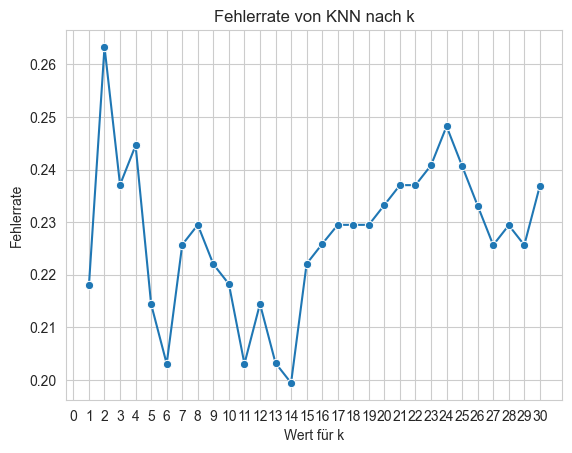

In [43]:
sns.lineplot(x=range(1, 31), y=error_rates, marker='o')
plt.xticks(range(31))
plt.title('Fehlerrate von KNN nach k')
plt.xlabel('Wert für k')
plt.ylabel('Fehlerrate');

In [47]:
# Geringste Fehlerrate:
min_error = min(error_rates)
min_error

np.float64(0.19944095038434662)

In [49]:
# Das k zur kleinsten Fehlerrate:
k = error_rates.index(min_error) + 1
print(f'Optimales k: {k}')

Optimales k: 14


# Hyperparameter, die wir verstellen werden:

### 1. Abstand
#### Euklidischer Abstand: Abstände sind Wurzel der quadrierten Abstände von x und y:
$$ euklidischerabstand = \sqrt{(x_1-x_0)^2+(y_1-y_0)^2} $$
#### Manhattanabstand: Betrag von Differenz zweier Punkte auf X-Achse + und der Differenz zweier Punkte auf Y-Achse:
$$ manhattanabstand = |x_1-x_0|+|y_1-y_0| $$
#### Es gibt noch weitere Metriken bei KNN.

### 2. Gewichtung
#### uniform: Punkte werden einheitlich gewichtet.
#### distance: Je weiter ein Punkt weg ist, desto schwächer fließt er ein.

In [84]:
knn2 = KNeighborsClassifier()

In [85]:
knn2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [86]:
# Definition der Parameter, deren Kombination wir untersuchen wollen:
grid_params = {
	'n_neighbors': [3, 4, 5, 6, 7, 8],
	'weights': ['uniform', 'distance'],
	'metric': ['euclidean', 'manhattan']
}

In [87]:
grid = GridSearchCV(knn2, grid_params, cv=5, verbose=1)

In [88]:
grid_results = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [89]:
# Bestes Resultat aus 20 Durchläufen:
grid_results.best_score_

np.float64(0.8043326345213139)

In [90]:
# Zum Vergleich Wert von weiter oben:
1 - min_error

np.float64(0.8005590496156534)

In [91]:
# Beste Parameter anzeigen lassen:
best_results = grid_results.best_params_
best_results

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [92]:
# Der umständlichste Weg:
knn_final = KNeighborsClassifier(
	n_neighbors=5,
	weights='distance',
	metric='manhattan'
)

In [93]:
# Auch umständlich:
knn_final = KNeighborsClassifier(
	n_neighbors=best_results['n_neighbors'],
	weights=best_results['weights'],
	metric=best_results['metric']
)

In [94]:
# Dictionary auf kwargs entpacken:
knn_final = KNeighborsClassifier(**best_results)

In [95]:
knn_final.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [96]:
knn_final.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [97]:
knn_final.score(X_test, y_test)

0.7611940298507462

# Pickle: Modelle einlagern und laden

In [98]:
# Modell speichern:
with open('sex_model_penguins.pkl', 'wb') as f:
	pickle.dump(knn_final, f)

In [99]:
# Modell wieder laden:
loaded_model = pickle.load(open('sex_model_penguins.pkl', 'rb'))

In [101]:
# ...und nutzen:
loaded_model.predict(X_test)

array(['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male'], dtype=object)

In [102]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
279,50.4,15.3,224.0,5550.0
44,37.0,16.9,185.0,3000.0
261,49.6,16.0,225.0,5700.0
180,46.4,17.8,191.0,3700.0
213,46.8,16.5,189.0,3650.0
...,...,...,...,...
264,50.5,15.9,222.0,5550.0
263,49.6,15.0,216.0,4750.0
2,40.3,18.0,195.0,3250.0
238,46.2,14.5,209.0,4800.0


In [103]:
loaded_model.score(X_test, y_test)

0.7611940298507462

In [107]:
# Nur so zum "Spaß":
grid_params = {
	'n_neighbors': range(1, 200),
	'weights': ['uniform', 'distance'],
	'metric': ['euclidean', 'manhattan']
}

In [108]:
grid = GridSearchCV(knn2, grid_params, cv=5, verbose=1)
grid_results = grid.fit(X_train, y_train)

Fitting 5 folds for each of 796 candidates, totalling 3980 fits


In [109]:
grid_results.best_score_

np.float64(0.8043326345213139)

In [112]:
grid_results.__dict__.keys()

dict_keys(['scoring', 'estimator', 'n_jobs', 'refit', 'cv', 'verbose', 'pre_dispatch', 'error_score', 'return_train_score', 'param_grid', 'multimetric_', 'best_index_', 'best_score_', 'best_params_', 'best_estimator_', 'refit_time_', 'feature_names_in_', 'scorer_', 'cv_results_', 'n_splits_'])

In [113]:
grid_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

# Übungsaufgabe

### Lade den Datensatz house_prices.csv und erstelle ein Modell, das die Lage der Gegenden voraussagt (Bay, Near Bay,...). Nutze Hyperparameter-Optimierung, um dein Modell zu optimieren!

In [104]:
houses = pd.read_csv('house_prices.csv')
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
